In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['figure.figsize']=(10,5)
sns.set_style("whitegrid")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/vboxuser/miniconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vboxuser/miniconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/vboxuser/miniconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/vboxuser/miniconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/vboxuser/miniconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/vboxuser/miniconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/vboxuser/miniconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/vboxuser/miniconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start

AttributeError: _ARRAY_API not found

In [2]:
print(os.listdir())

['Untitled5.ipynb', 'miniconda3', '.ipynb_checkpoints', 'eda .ipynb', '.bash_history', 'miniconda3~', 'ipl aouction.ipynb', 'IPL_Squad_2023_Auction_Dataset.csv', 'Untitled20.ipynb', 'Downloads', 'numpy.ipynb', '.conda', 'Predicting Air Quality Index using Python.ipynb', 'Fraud.csv', 'Cleaned_DS_Jobs.csv', 'Untitled15.ipynb', 'cleaned - cleaned.csv', '.wget-hsts', 'customer_data (1).csv', 'janhvi dap class.ipynb', '.vboxclient-hostversion-tty2-control.pid', '.gnupg', 'Untitled25.ipynb', 'Templates', '.config', 'DAPproject 2.ipynb', '.local', '71 Centuries of Virat Kohli (1).csv', 'Untitled26.ipynb', 'Untitled23.ipynb', 'audible_uncleaned.csv', 'Untitled7.ipynb', '.pgadmin', 'Untitled1.ipynb', '.vboxclient-draganddrop-tty2-control.pid', 'Data Analytics Assignment.xlsx', 'train.csv', 'Untitled16.ipynb', '.vboxclient-vmsvga-session-tty2-control.pid', 'lab2.1AB', 'cache', 'Deep Tech Report-Latest_Course Complete__Table (10)(6).csv', 'Untitled11.ipynb', 'AQI Data Set.csv', 'Untitled9.ipynb',

#  Load datasets

In [8]:
sentiment_df=pd.read_csv('fear_greed_index.csv')
trade_df=pd.read_csv('historical_data.csv')

# intial data inspection

In [9]:
print("sentiment shape",sentiment_df.shape)
print("trades shape",trade_df.shape)
sentiment_df.head()
trade_df.head()
sentiment_df.info()
trade_df.info()

sentiment shape (2644, 4)
trades shape (211224, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 no

# missing values and duplicates 

In [10]:
sentiment_df.isnull().sum()
trade_df.isnull().sum()
sentiment_df.duplicated().sum()
trade_df.duplicated().sum()

np.int64(0)

# Convert date and timestamp

In [18]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df.head()
trade_df['Timestamp IST'] = pd.to_datetime(trade_df['Timestamp IST'],dayfirst=True,errors='coerce')
trade_df['date'] = trade_df['Timestamp IST'].dt.date
trade_df['date'] = pd.to_datetime(trade_df['date'])
trade_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


# Merge Sentiment with trades

In [19]:
merged_df=trade_df.merge(sentiment_df[['date','classification']],on='date',how='inner')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


# Daily PnL per Trader

In [21]:
daily_pnl=(merged_df.groupby(['Account','date','classification'])['Closed PnL'].sum().reset_index())
daily_pnl.head()

,Account,date,classification,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1


# Win Rate

In [22]:
merged_df['win']=merged_df['Closed PnL'] > 0
win_rate=(merged_df.groupby('classification')['win'].mean().reset_index())
win_rate

,classification,win
0,Extreme Fear,0.370607
1,Extreme Greed,0.464943
2,Fear,0.420768
3,Greed,0.384828
4,Neutral,0.396991


# Number of Trades per Day

In [26]:
trade_per_day = (merged_df.groupby(['date', 'classification']).size().reset_index(name='num_trades'))
trade_per_day.head()

,date,classification,num_trades
0,2023-05-01,Greed,3
1,2023-12-05,Extreme Greed,9
2,2023-12-14,Greed,11
3,2023-12-15,Greed,2
4,2023-12-16,Greed,3


# Trade Size Distribution

In [31]:
merged_df.groupby('classification')['Size USD'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,5349.731843,22306.826180,0.01,282.4825,766.150,2329.9700,1120971.60
Extreme Greed,39992.0,3112.251565,11061.998403,0.00,106.7575,500.050,1882.8375,665771.71
Fear,61837.0,7816.109931,51914.859249,0.00,235.6300,735.960,2499.9700,3921430.72
Greed,50303.0,5736.884375,30533.418602,0.00,184.1300,555.000,2100.7000,2227114.71
Neutral,37686.0,4782.732661,37461.883466,0.01,175.5400,547.655,1994.2050,3641180.84


# PnL Distribution:Fear vs Greed

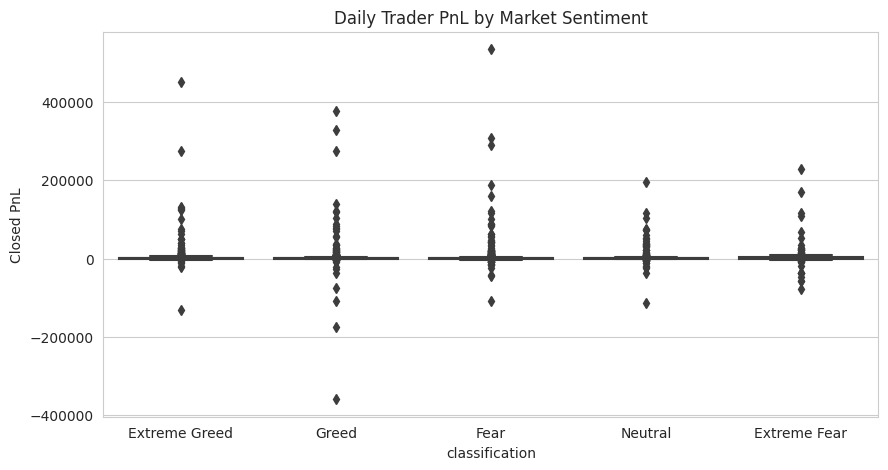

In [32]:
sns.boxplot(data=daily_pnl,x='classification',y='Closed PnL')
plt.title("Daily Trader PnL by Market Sentiment")
plt.show()

# Win Rate Comparison

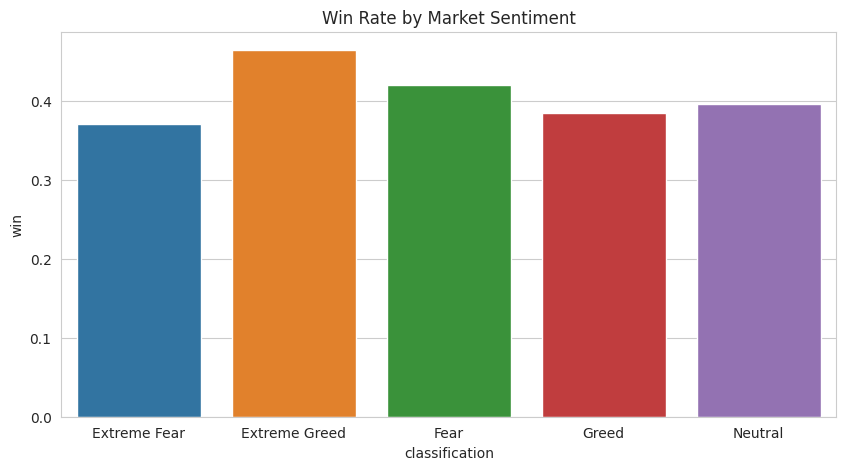

In [34]:
sns.barplot(data=win_rate,x='classification',y='win')
plt.title("Win Rate by Market Sentiment")
plt.show()

# Trade Frequency

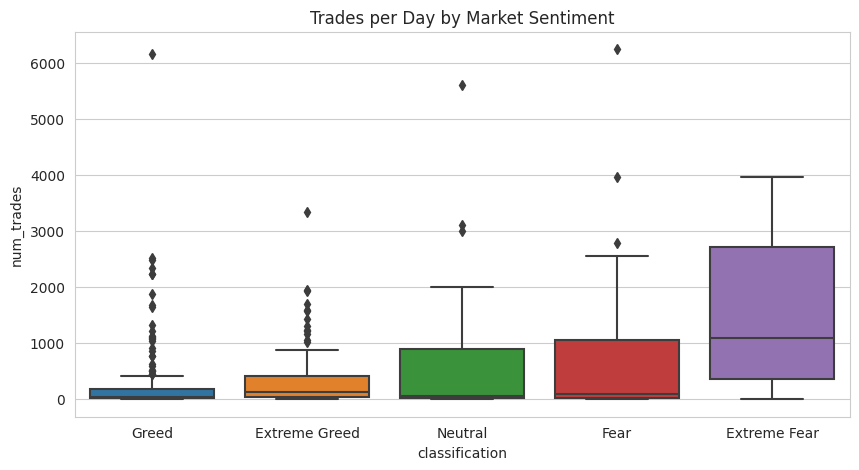

In [36]:
sns.boxplot(data=trade_per_day,x='classification',y='num_trades')
plt.title("Trades per Day by Market Sentiment")
plt.show()

# High vs Low Explosure Traders

In [37]:
median_size=merged_df['Size USD'].median()
merged_df['exposure_group']=np.where(merged_df['Size USD'] >= median_size,'High Exposure','Low Exposure')

In [41]:
segment_pnl = (merged_df.groupby(['exposure_group', 'classification'])['Closed PnL'].mean() .reset_index())
segment_pnl

,exposure_group,classification,Closed PnL
0,High Exposure,Extreme Fear,61.196379
1,High Exposure,Extreme Greed,140.570044
2,High Exposure,Fear,97.021659
3,High Exposure,Greed,84.297789
4,High Exposure,Neutral,69.578672
5,Low Exposure,Extreme Fear,1.157202
6,Low Exposure,Extreme Greed,9.628661
7,Low Exposure,Fear,3.578952
8,Low Exposure,Greed,3.609825
9,Low Exposure,Neutral,2.187618


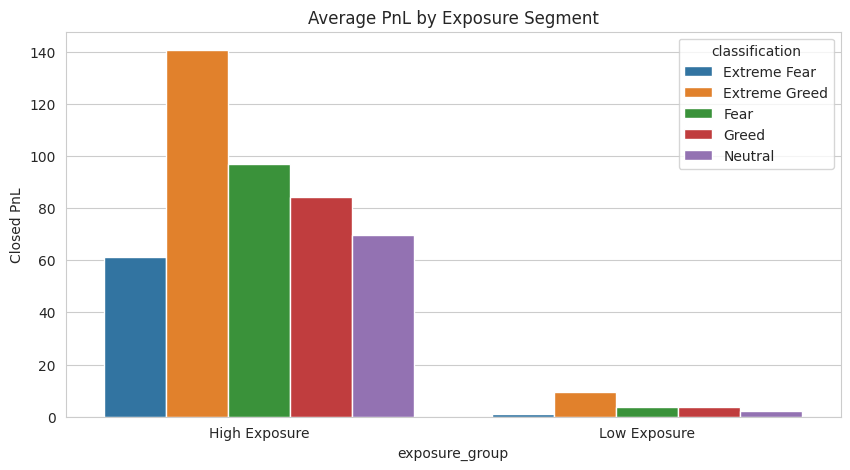

In [42]:
sns.barplot(data=segment_pnl,x='exposure_group',y='Closed PnL',hue='classification')
plt.title("Average PnL by Exposure Segment")
plt.show()

# Frequent vs Infrequent Traders

In [44]:
trade_counts=merged_df.groupby('Account').size()
median_trades=trade_counts.median()
merged_df['trader_type']=merged_df['Account'].map(lambda x:'Frequent' if trade_count[x] > median_trades else 'Infrequent')

# Simple Predictive Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [47]:
daily_features=(merged_df.groupby(['Account','date','classification']).agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
})
  .reset_index()
)
daily_features['profitable']=daily_features['Closed PnL'] > 0

In [49]:
X = pd.get_dummies(daily_features[['classification','Size USD']], drop_first=True)
y = daily_features['profitable']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.6068376068376068